In [3]:
library(readxl)
library(dplyr)

customer_r <- read_excel("customer_r.xlsx")
reservation_r <- read_excel("reservation_r.xlsx")
order_info_r <- read_excel("order_info_r.xlsx")
item_r <- read_excel("item_r.xlsx")
colnames(customer_r) <- tolower(colnames(customer_r))
colnames(reservation_r) <- tolower(colnames(reservation_r))
colnames(order_info_r) <- tolower(colnames(order_info_r))
colnames(item_r) <- tolower(colnames(item_r))

In [6]:
total_amt <- order_info_r %>%
    group_by(reserv_no) %>%
    summarise(amt_daily = sum(sales/1000)) %>%
    arrange(reserv_no)

total_amt

reserv_no,amt_daily
2019060301,140
2019060601,152
2019060701,48
2019061601,105
2019061801,48
2019062001,10
2019062201,48
2019062601,8
2019062901,54
2019070101,50


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


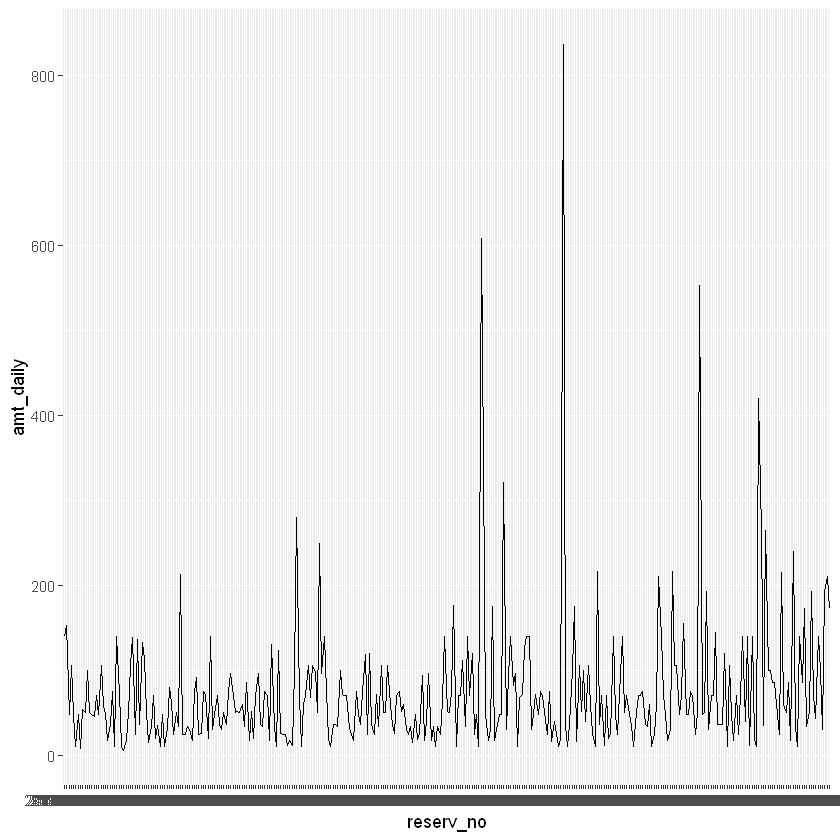

In [9]:
library("ggplot2")
ggplot(total_amt, aes(x = reserv_no, y = amt_daily, group = 1)) + geom_line()

In [10]:
total_amt <- order_info_r %>%
    mutate(month = substr(reserv_no, 1, 6)) %>%
    group_by(month) %>%
    summarise(amt_monthly = sum(sales/1000))

total_amt 

month,amt_monthly
201906,613
201907,1744
201908,1622
201909,1586
201910,3333
201911,5197
201912,10862


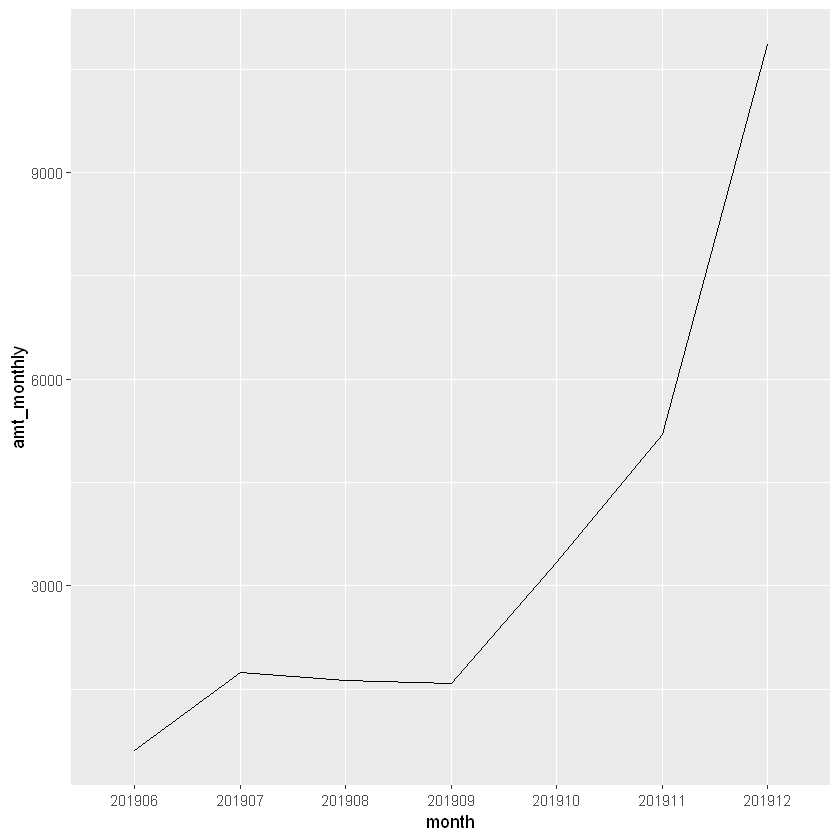

In [11]:
ggplot(total_amt, aes(x = month, y = amt_monthly, group = 1)) + geom_line()

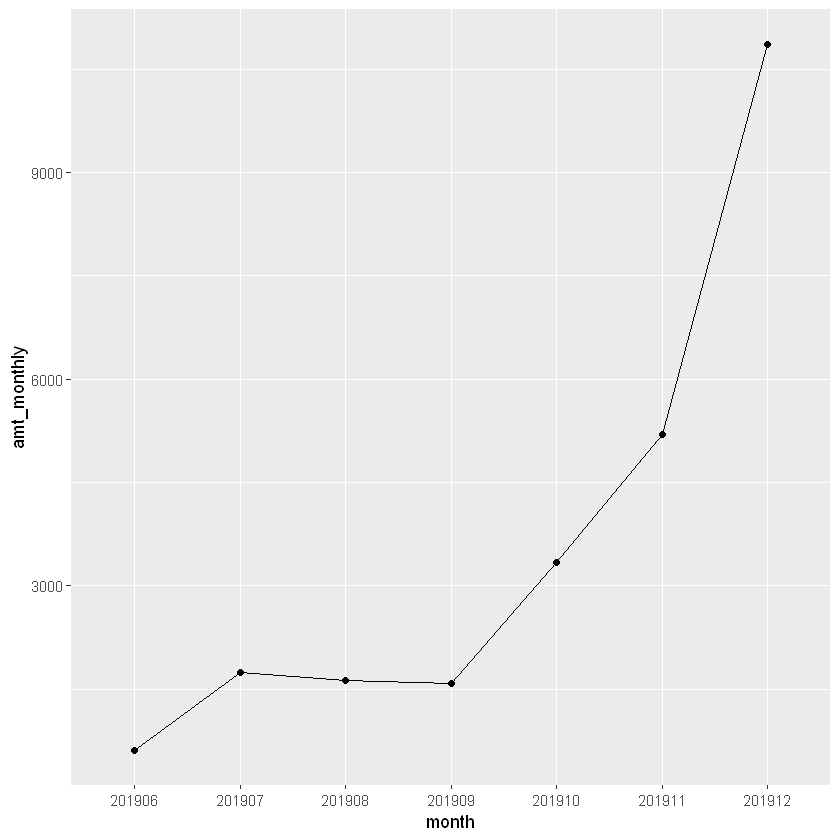

In [12]:
ggplot(total_amt, aes(x = month, y = amt_monthly, group = 1)) +
    geom_line() +
    geom_point()

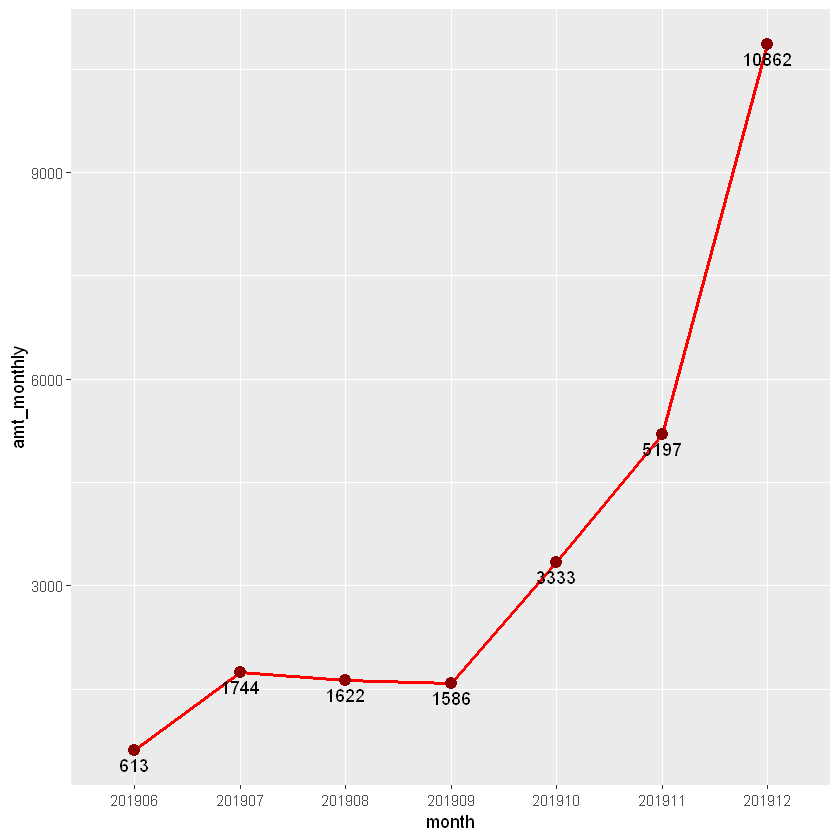

In [13]:
ggplot(total_amt, aes(x = month, y = amt_monthly, group = 1, label = amt_monthly)) +
    geom_line(color = "red", size = 1) +
    geom_point(color = "darkred", size = 3) +
    geom_text(vjust = 1.5, hjust = 0.5)

In [14]:
tail(ToothGrowth)

,len,supp,dose
55,24.8,OJ,2
56,30.9,OJ,2
57,26.4,OJ,2
58,27.3,OJ,2
59,29.4,OJ,2
60,23.0,OJ,2


In [19]:
df <- ToothGrowth  %>% 
      group_by(dose) %>% 
      summarise(sd=sd(len), len=mean(len))

In [20]:
df

dose,sd,len
0.5,4.499763,10.605
1.0,4.415436,19.735
2.0,3.774150,26.100


Warning message:
"Ignoring unknown aesthetics: ground"

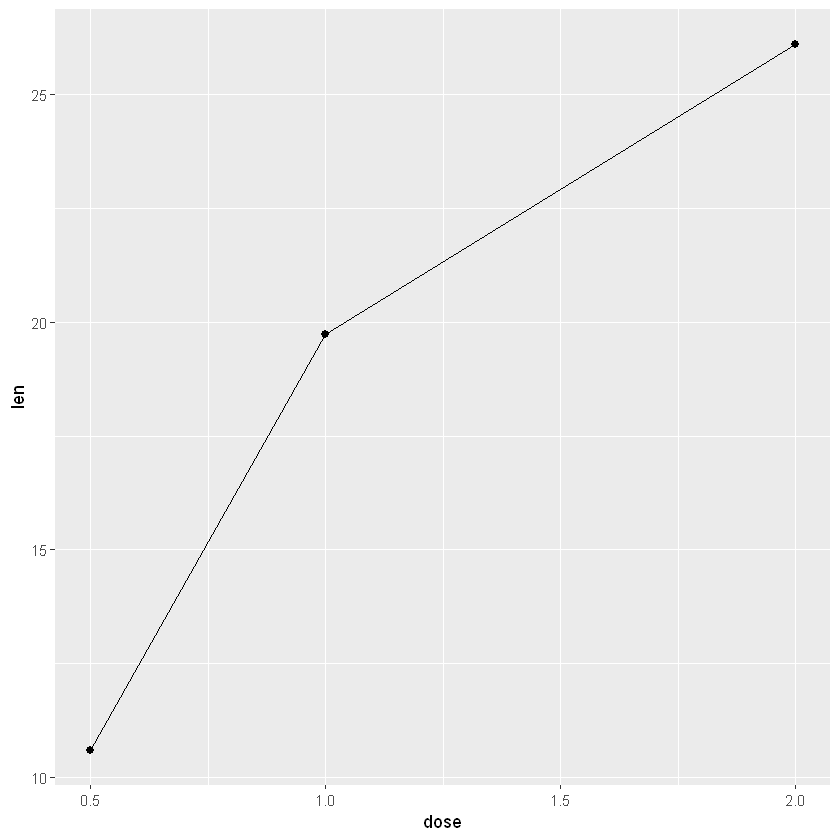

In [25]:
ggplot(df,aes(dose,len)) +
        geom_line(aes(ground=1))+ # geon_line 그래프를 그릴때는 반드시 ground를 지정해야 한다.
        geom_point(size=2)

In [30]:
df2 <- ToothGrowth %>% 
    group_by(dose, supp) %>% 
    summarise(sd=sd(len),len=mean(len))

`summarise()` has grouped output by 'dose'. You can override using the `.groups` argument.


In [31]:
df2

dose,supp,sd,len
0.5,OJ,4.459709,13.23
0.5,VC,2.746634,7.98
1.0,OJ,3.910953,22.70
1.0,VC,2.515309,16.77
2.0,OJ,2.655058,26.06
2.0,VC,4.797731,26.14


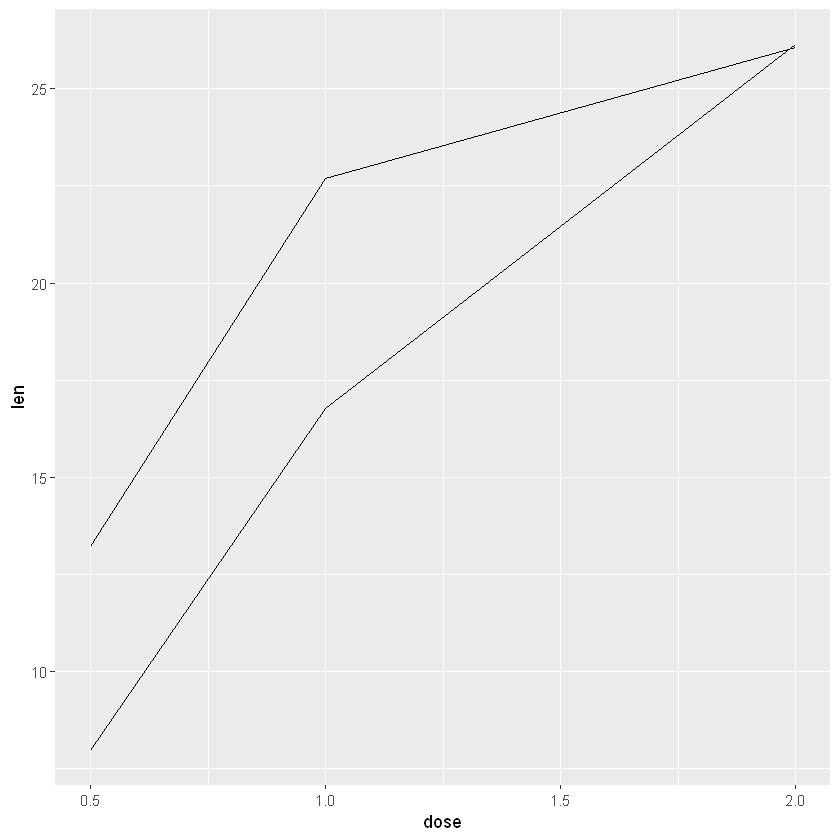

In [32]:
ggplot(df2,aes(dose, len))+
    geom_line(aes(group=supp))

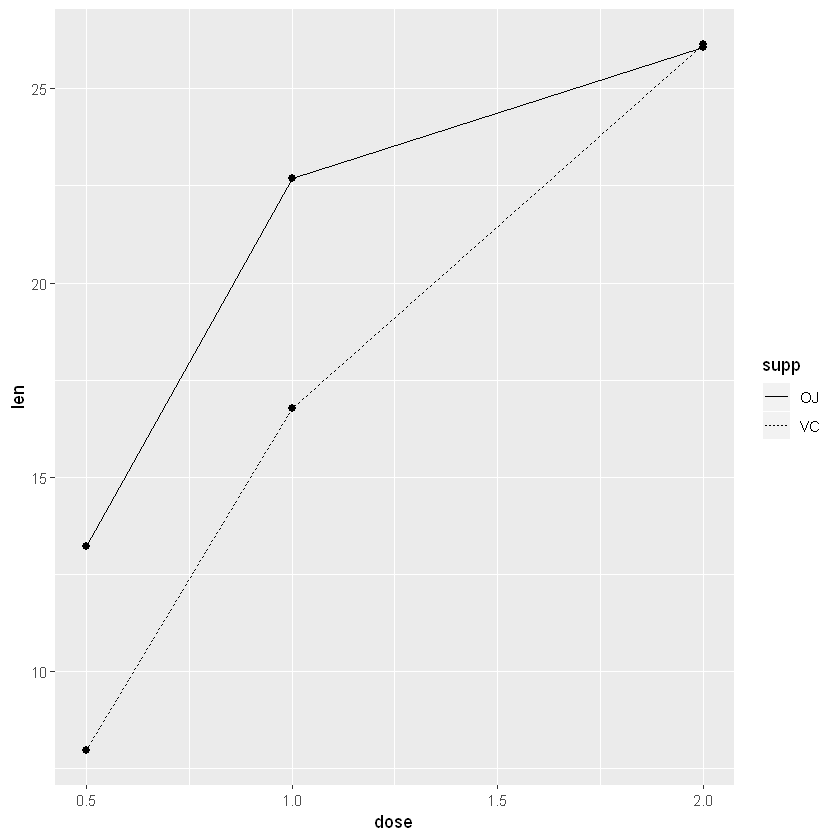

In [34]:
ggplot(df2,aes(dose,len)) +
    geom_line(aes(group=supp,linetype=supp)) +
    geom_point(size=2)

In [35]:
df_boxplot_graph <- inner_join(order_info_r, item_r, by = "item_id")

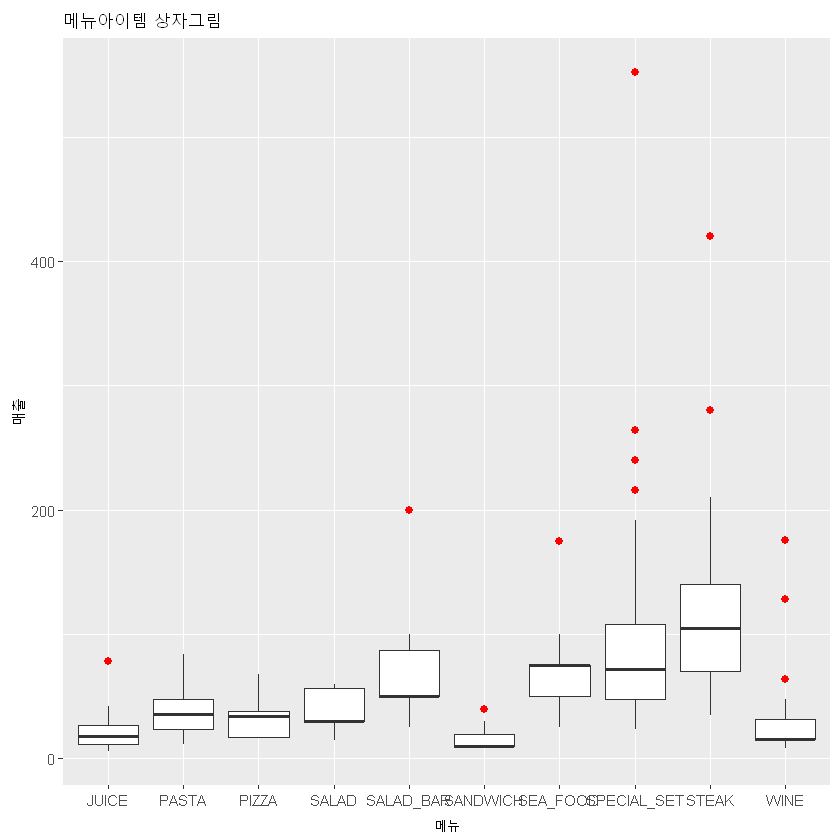

In [36]:
ggplot(df_boxplot_graph, aes(x = product_name, y = sales/1000)) +
    geom_boxplot(width = 0.8, outlier.size = 2, outlier.colour = "red") +
    labs(title = "메뉴아이템 상자그림", x = "메뉴", y = "매출")